# Davis Franklin

## Research Question #1

**I would like to further investigate Apple's market capitalization by specifically looking at the effect that the release of a new iPhone has on Apple's market value. I would like to analyze weather the market responds positively or negatively to the release of each iPhone and how much the stock value is impacted.** From this, I hope to determine which iPhone had the largest positive impact and which iPhone had the largest negative impact on Apple's stock value.

---
## Research Question #2
**To discover what iPhone release month has the greatest positive impact on Apple's market value.** I would like to see if apples yearly september release is justified or if Apple has success with releasing iPhones at different times of the year.

---
## Action Plan
I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer this research question by using an additional dataset that includes every iPhone. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times. After the initial EDA it is apparent that there is a relationship between Apple's stock value and the invention of the iPhone; therefore, the goal is to further analyze this relationship.

## Imports:

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import calendar
import datetime

sns.set_theme(style="ticks", font_scale=1)
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### Loading Data:

In [404]:
stocks_df = pd.read_csv("../data/raw/AAPL_stock.csv")
iPhone_df = pd.read_csv("../data/raw/iPhones.csv")

---
### Data Understanding: 
In this step I inspect the two datasets to further understand, and discover what parts need to cleaned or processed. 

### For stocks_df:

In [405]:
stocks_df.shape

(10443, 7)

In [406]:
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [407]:
stocks_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [408]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [409]:
stocks_df.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For iPhone_df:

In [410]:
iPhone_df.shape

(37, 2)

In [411]:
iPhone_df.head()

,iPhone,Release_Date
0,iPhone 1st Gen,2007-01-09
1,iPhone 3G,2008-05-09
2,iPhone 3Gs,2009-05-08
3,iPhone 4,2010-05-07
4,iPhone 4S,2011-10-04


In [412]:
iPhone_df.dtypes

iPhone          object
Release_Date    object
dtype: object

In [413]:
iPhone_df.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,2022-09-07
freq,1,4


In [414]:
first_iPhone = iPhone_df['Release_Date'].min()
print(f"The first iPhone was released n: {first_iPhone}")

newest_iPhone = iPhone_df['Release_Date'].max()
print(f"The newest iPhone was released on: {newest_iPhone}")

The first iPhone was released n: 2007-01-09
The newest iPhone was released on: 2022-09-07


---
## Data Cleaning:
In this step I converted the 'Date' column to be in datetime format, I renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces), and I checked if there was any null values for both datasets.  

### For stocks_df:

In [415]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [416]:
stocks_df = stocks_df.rename(columns={'Adj Close': 'Adj_Close'})
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [417]:
stocks_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [418]:
stocks_df.to_csv('../data/processed/APPL_processed_analysis1.csv')

### For iPhones_df:

In [419]:
iPhone_df['Release_Date'] = pd.to_datetime(iPhone_df['Release_Date'])

In [420]:
iPhone_df.columns

Index(['iPhone', 'Release_Date'], dtype='object')

In [421]:
iPhone_df.isna().sum()

iPhone          0
Release_Date    0
dtype: int64

In [422]:
iPhone_df.to_csv('../data/processed/iPhone_processed_analysis1.csv')

---
## Data Wrangling:

* Merging df_iPhones and df_stocks

In [423]:
merged_df = pd.merge(stocks_df, iPhone_df, how='outer', left_on='Date', right_on='Release_Date')

In [424]:
merged_df['Date'] = merged_df['Date']

---
## Data Processing:

* Creating a change column: closing value - opening value

In [425]:
merged_df['Change'] = merged_df['Close'] - merged_df['Open']

* Dropping unneeded columns

In [426]:
merged_df = merged_df.drop(['High','Low','Open', 'Close', 'Release_Date'], axis=1)

* dropping unneeded rows

In [427]:
cutoff_date = pd.to_datetime('2000-01-01')
merged_df = merged_df.loc[merged_df['Date'] >= cutoff_date]

* Using groupby to get a count of how many iPhones were released in each month

In [428]:
release_counts_month = merged_df.groupby(merged_df['Date'].dt.month)['iPhone'].count()
release_counts_month = release_counts_month[release_counts_month != 0]

* saving the final dataframe as a csv file

In [429]:
merged_df.to_csv('../data/processed/analysis1_final.csv')

---
## Data Visualizations:

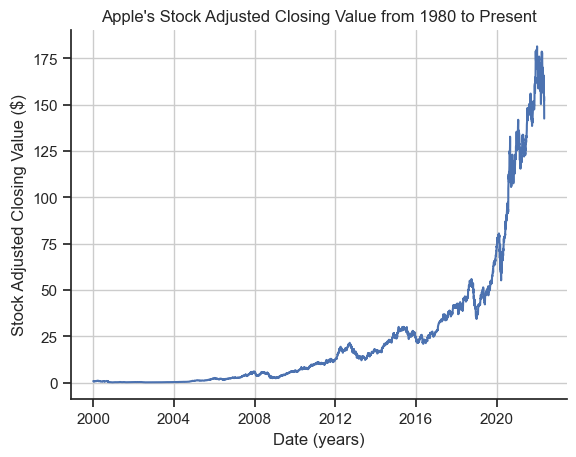

In [430]:
sns.lineplot(x='Date', y='Adj_Close', data=merged_df)
plt.title("Apple's Stock Adjusted Closing Value from 1980 to Present")
plt.ylabel("Stock Adjusted Closing Value ($)")
plt.xlabel("Date (years)")
plt.grid(True)
plt.show()

This plot shows an overview of how Apple's stock value has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value was low until the release of the first iPhone where the stock value began to increase rapidly. Further analysis is needed to look at specific time frames to conclude which iPhones were sucesses for Apple.

Taking a closer look at the pervious plot. Specifically looking at each day an iPhone is released.

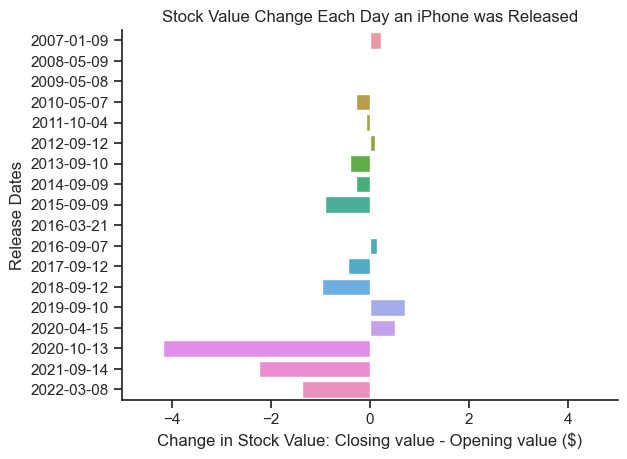

In [438]:
temp_df = merged_df[merged_df['iPhone'].notnull()]
#temp_df['Date'] = temp_df['Date'].dt.date
sns.barplot(y=temp_df['Date'].dt.date, x='Change', data=temp_df)
plt.title("Stock Value Change Each Day an iPhone was Released")
plt.xlim(-5, 5)
plt.xlabel("Change in Stock Value: Closing value - Opening value ($)")
plt.ylabel("Release Dates")
plt.show()

Now we can see exactly how the stock market reacted for the release of each iPhone. Here we can see that the release of iPhones have been more detrimental to Apple's stock values than successful. Specifically, 

To give more context to the previous plot we can use the next plot to see which iPhones where released on each day.

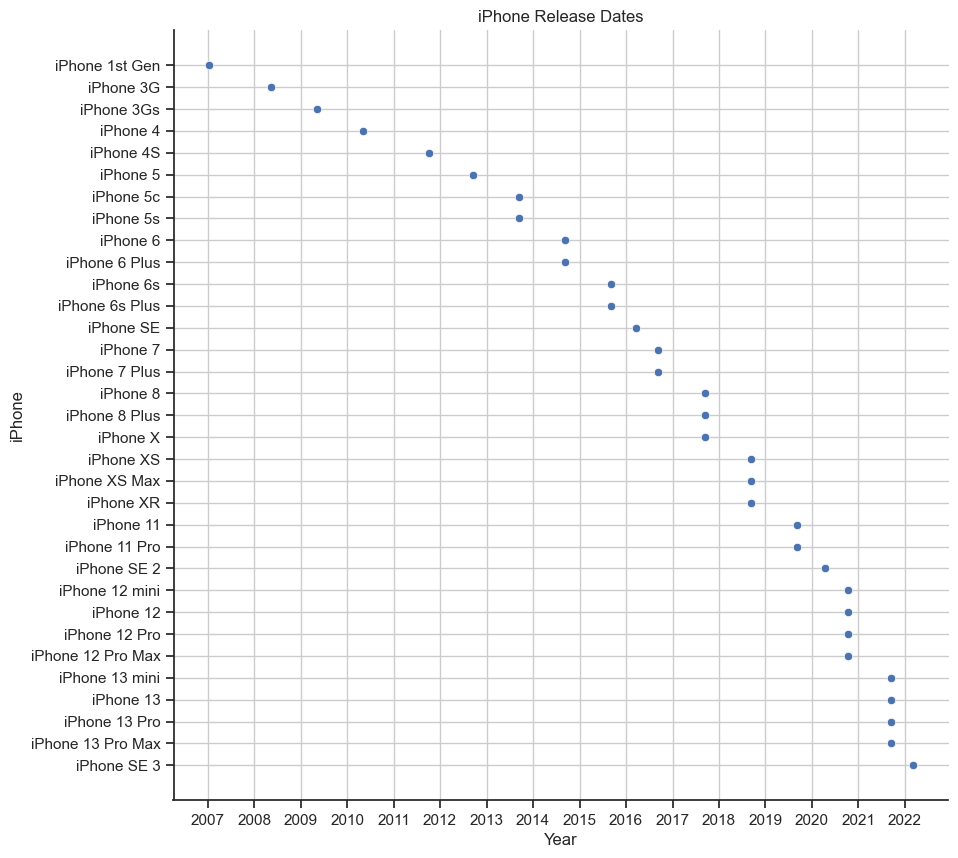

In [432]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Date', y='iPhone', data=merged_df.dropna())

plt.xlabel("Year")
plt.ylabel("iPhone")
plt.title("iPhone Release Dates")

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

This plot visually shows each iPhone and the date they were released. This plot shows that the first iPhone was released in 2007, and Apple has released a new iPhone every year since 2007. Also, as time progresses Apple started to release more than one iPhone each year, with a maximum amount of iPhones released in 2020 where 5 phones were released.

---
## Answer #1:
From the previous three plots we can now answer the first research question. The iPhone 12 group had the greatest negative impact on Apple's stock value and the iPhone 11 group had the greatest positive impact on Apple's stock value. Also, interestly Apple's first iPhone had a postive impact on the stock value, which seems strange for such a large and far fetched innovation for its time.

---

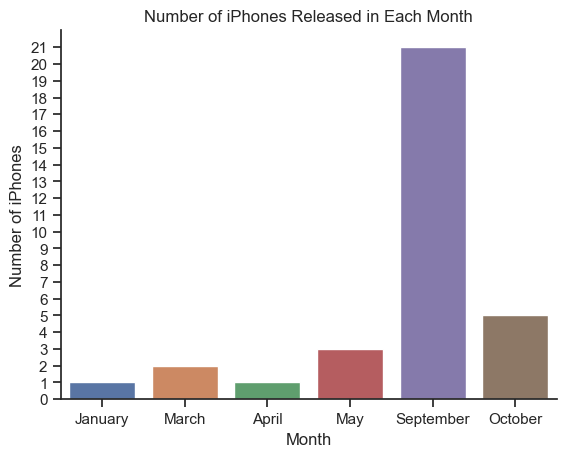

In [433]:
sns.barplot(x=[calendar.month_name[int(i)] for i in release_counts_month.index], y=release_counts_month.values)
plt.yticks(range(0, max(release_counts_month.values)+1, 1))
plt.ylabel("Number of iPhones")
plt.xlabel("Month")
plt.title("Number of iPhones Released in Each Month")
plt.show()

This plot shows which month iPhones have been released and the quantity of each month. iPhones have only been released in January, March, April, May, September, and October. September has the most phones released with 21 iPhones being released in September.